In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Input, Concatenate
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import MeanSquaredError, MeanSquaredLogarithmicError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError


In [3]:
tensorflow.test.gpu_device_name()

# Load the TensorBoard notebook extension
%load_ext tensorboard
import datetime, os

In [4]:
df = pd.read_csv('train.csv')
df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [5]:
df['Id'] = df['Id'] + '.jpg';
df['Id']

0       0007de18844b0dbbb5e1f607da0606e0.jpg
1       0009c66b9439883ba2750fb825e1d7db.jpg
2       0013fd999caf9a3efe1352ca1b0d937e.jpg
3       0018df346ac9c1d8413cfcc888ca8246.jpg
4       001dc955e10590d3ca4673f034feeef2.jpg
                        ...                 
9907    ffbfa0383c34dc513c95560d6e1fdb57.jpg
9908    ffcc8532d76436fc79e50eb2e5238e45.jpg
9909    ffdf2e8673a1da6fb80342fa3b119a20.jpg
9910    fff19e2ce11718548fa1c5d039a5192a.jpg
9911    fff8e47c766799c9e12f3cb3d66ad228.jpg
Name: Id, Length: 9912, dtype: object

In [6]:
train_df, val_df = train_test_split(df,test_size=0.2)

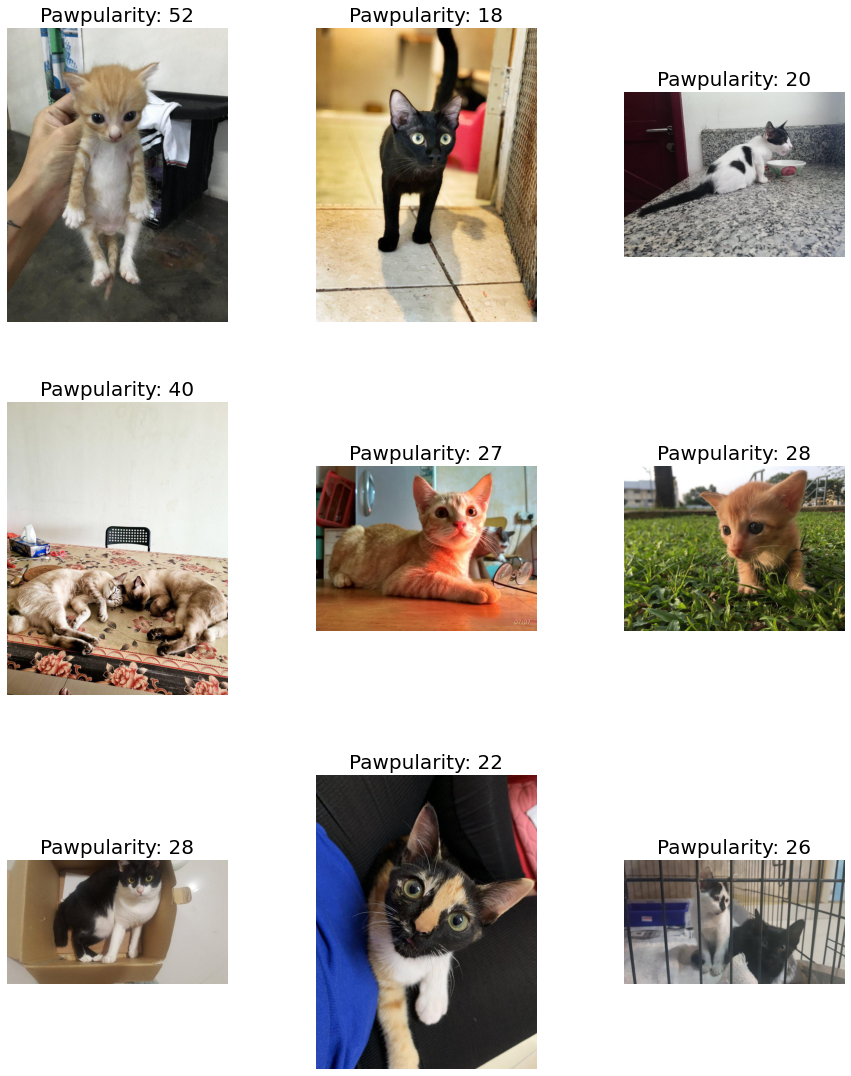

In [7]:
import random;
rows, cols = 3, 3;
fig, axs = plt.subplots(rows, cols, figsize=(15,15));
fig.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.4);
for i in range(rows):
    for j in range(cols):
      random_image = random.randint(0,len(df)-1);
      img = mpimg.imread('train/'+df['Id'][random_image]);
      axs[i,j].imshow(img);
      axs[i,j].axis('off');
      axs[i,j].set_title(f'Pawpularity: {df["Pawpularity"][random_image]}',{'fontsize': 20});

In [8]:
InceptionResNetV2 = InceptionResNetV2(
    weights=None,
    include_top=False,
    input_tensor=None,
    input_shape=(300,300,3),
    pooling='max'
)

###

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm



In [31]:
import os
import random

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout, Input, Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [43]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  
img_size = 224
channels = 3
Batch_size = 64

# Directory for dataset

train_dir = "train/"
test_dir = "test/"

def seed_everything():
    np.random.seed(123)
    random.seed(123)
    tf.random.set_seed(123)
    os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'
    os.environ['PYTHONHASHSEED'] = str(123)

seed_everything()

In [44]:
# Reading dataset train, test in df and df_test respectively

df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
Id = df_test["Id"].copy()


# Converting Id column for taking images

df["Id"] = df["Id"].apply(lambda x : x + ".jpg")
df_test["Id"] = df_test["Id"].apply(lambda x : x + ".jpg")

In [45]:
df_test

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3.jpg,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e.jpg,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d.jpg,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486.jpg,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4.jpg,1,1,1,0,1,1,0,1,0,1,1,0
5,b03f7041962238a7c9d6537e22f9b017.jpg,0,0,1,1,1,1,1,1,1,0,1,0
6,c978013571258ed6d4637f6e8cc9d6a3.jpg,1,0,0,0,1,1,0,1,0,1,1,1
7,e0de453c1bffc20c22b072b34b54e50f.jpg,1,0,1,0,0,0,0,0,1,0,0,1


In [46]:
df.drop([ 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],axis = 1,inplace = True)

In [47]:
df.head()

,Id,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0.jpg,63
1,0009c66b9439883ba2750fb825e1d7db.jpg,42
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,28
3,0018df346ac9c1d8413cfcc888ca8246.jpg,15
4,001dc955e10590d3ca4673f034feeef2.jpg,72


In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import MeanAbsoluteError, MeanAbsolutePercentageError

In [49]:
train_datagen = ImageDataGenerator(
                rescale = 1.0/255.0,
                horizontal_flip = True,
                fill_mode = "nearest", zoom_range = 0.2,
                width_shift_range = 0.2, height_shift_range=0.2,
                rotation_range=30,
)

In [65]:
train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="train/",
    x_col="Id",
    y_col="Pawpularity",
    batch_size=64,
    shuffle=True,
    class_mode="raw",
    target_size=(300,300)
);

validation = train_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory="train/",
    x_col="Id",
    y_col="Pawpularity",
    batch_size=10,
    shuffle=False,
    class_mode="raw",
    target_size=(300,300)
);

Found 7929 validated image filenames.
Found 1983 validated image filenames.


In [68]:
inputs = keras.Input(shape=(300, 300, 3))

X = Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu')(inputs)
X = MaxPool2D(pool_size=(2, 2))(X)

X = Conv2D(filters=128, kernel_size=3, strides=2, padding='same', activation='relu')(X)
X = MaxPool2D(pool_size=(2, 2))(X)

X = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', activation='relu')(X)
X = MaxPool2D(pool_size=(2, 2))(X)

X = Flatten()(X)

X = Dense(512, activation='relu')(X)
X = Dropout(0.3)(X)

outputs = Dense(1)(X)

model = keras.Model(inputs=inputs, outputs=outputs)

In [69]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 38, 38, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 256)        

In [70]:
LEARNING_RATE= 1E-3

early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss=MeanSquaredError(),
    metrics=[RootMeanSquaredError()]
)

In [72]:
epochs = 30

history = model.fit(
    train,
    validation_data=validation,
    epochs=epochs,
    callbacks=[early_stopper]
)

Epoch 1/30
124/124 [==============================] - 527s 4s/step - loss: 498.2379 - root_mean_squared_error: 22.3212 - val_loss: 452.4036 - val_root_mean_squared_error: 21.2698
Epoch 2/30
124/124 [==============================] - 474s 4s/step - loss: 454.0614 - root_mean_squared_error: 21.3087 - val_loss: 453.1882 - val_root_mean_squared_error: 21.2882
Epoch 3/30
124/124 [==============================] - 453s 4s/step - loss: 435.8732 - root_mean_squared_error: 20.8776 - val_loss: 450.9609 - val_root_mean_squared_error: 21.2358
Epoch 4/30
124/124 [==============================] - 486s 4s/step - loss: 439.6410 - root_mean_squared_error: 20.9676 - val_loss: 494.2684 - val_root_mean_squared_error: 22.2321
Epoch 5/30
124/124 [==============================] - 513s 4s/step - loss: 437.1910 - root_mean_squared_error: 20.9091 - val_loss: 450.5882 - val_root_mean_squared_error: 21.2271
Epoch 6/30
124/124 [==============================] - 532s 4s/step - loss: 436.4531 - root_mean_squared_e